# **Revolutionizing Customer Retention: How Exploratory Data Analysis (EDA) is Key to Reducing Churn in the Music Industry**

## **Revolutionizing Customer Retention: A Leap Forward with Reducing Churn in the Music Industry**

**The Challenge**
- U-Series Music is experiencing a recent surge in customer churn, threatening its subscriber base and long-term growth. Understanding the factors driving this churn is critical for reversing the trend and enhancing customer retention.

**The Opportunity**
- With access to detailed customer subscription data and music listening history, we have a unique opportunity to dive deep into the data using Exploratory Data Analysis (EDA). By uncovering patterns and insights, we can identify the key drivers of churn and address them effectively.

**Our Solution**
- We’ll undertake a structured data science process, starting with scoping the project to define objectives. Then, we’ll gather and clean the data using Python, followed by a thorough exploration and visualization of the data to extract meaningful insights. Finally, we’ll prepare the data for future modeling efforts, setting the stage for predictive analytics.

**The Impact**
- By leveraging EDA, we aim to provide U-Series Music with actionable insights that can directly inform strategies to reduce churn. This proactive approach not only helps in retaining customers but also positions Maven Music for sustainable growth and a stronger competitive edge in the market.

## **Business Impact**

1.Enhanced Customer Retention: By identifying key drivers of churn, U-Series Music can implement targeted strategies to retain more customers, directly improving subscription renewal rates and reducing customer acquisition costs.

2.Increased Revenue Stability: Reducing churn leads to a more predictable and stable revenue stream, allowing for better financial planning and resource allocation.

3.Data-Driven Decision Making: The insights gained from EDA empower the company to make informed, data-driven decisions, which enhances strategic planning and operational efficiency.

4.Personalized Customer Experience: Understanding customer behavior through data analysis allows U-Series Music to tailor its offerings, creating a more personalized and engaging experience that strengthens customer loyalty.

5.Competitive Advantage: By proactively addressing churn through data insights, U-Series Music can differentiate itself from competitors, establishing itself as a customer-centric brand.

6.Scalability and Future Growth: The preparation of data for future modeling lays the groundwork for advanced analytics, such as predictive modeling, which can be used to anticipate and mitigate churn risks as the company scales.

7.Cost Efficiency: Identifying and addressing the root causes of churn early can reduce the need for expensive reactive measures, such as win-back campaigns or excessive discounting.

8.Brand Reputation: Successfully reducing churn can enhance U-Series Music’s reputation as a reliable and customer-focused service provider, attracting new customers and retaining existing ones.


## Step 1: Load Libraries

**Data Set**:

2 files included are as per the following:

- Customer data: music_customers.csv
- Listing history: music_listening_history.xlsx

In [3]:
# First let's read the customer data 
import pandas as pd

customers = pd.read_csv('music_customers.csv')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [4]:
# Now let's read in the Listening history

listening_history = pd.read_excel('music_listening_history.xlsx')
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [5]:
# Now lets read the data in audio tab

audio = pd.read_excel('music_listening_history.xlsx', sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [6]:
# Now we will read session data
sessions = pd.read_excel('music_listening_history.xlsx', sheet_name=2)
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## Step 2: Data Cleaning

### 2a. Convert Data Types

In [7]:
# Check the customers data types 
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [8]:
# Now check the listening history data types
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [9]:
# Now check Audio data types
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [10]:
# Check session data types
sessions.dtypes


Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [11]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [12]:
# Convert objects to numeric and datetime fields
customers['Member Since'] = pd.to_datetime(customers['Member Since'])
customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].str.replace('$', ''))
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])


In [13]:
# Now lets check new data
customers.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

## Step 3: Data Preprocessing

In this steps we will check for missing data, inconcistent text, duplicate data and outliers

### Missing Data

In [14]:
# Let's find out NaN values in the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


In [15]:
# Lets check listening history for missing values
listening_history.info()
# No NaNs in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [16]:
# No NaNs in audio
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes


In [17]:
# No NaNs in sessions
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [18]:
# Customers dataframe null values in the fields subscrion plan, Discount and Cancellation Date
customers.head()


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [19]:
# Now look into Subsvription Plan : all NaN subscription plans are $2.99
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [20]:
# Check the unique subscription rates
customers[['Subscription Rate', 'Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [21]:
# for Basic plan, it looks like $2.99. Hence fill missing susbscription plan values with 'Basic'
customers['Subscription Plan'] = customers['Subscription Plan'].fillna('Basic (Ads)')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [22]:
# Now let's look into Discount ? column
customers[['Customer ID', 'Discount?']].tail()

,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [23]:
# Lets relook at Discount? column again
customers['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [24]:
# we will need to change Discount? column to numeric
import numpy as np
customers['Discount?'] = np.where(customers['Discount?']== 'Yes', 1,0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


### Inconsistent Text amd Typos

In [25]:
# Let's look at customers -- the subscription rate is looking too high
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [26]:
customers[customers['Subscription Rate'] > 7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


99.99 is way too high and looks like a typo error

In [27]:
# We will fix 99.99 typo now
customers.iloc[15,5] = 9.99


In [28]:
# Check the date range of customers
customers['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [29]:
# Now we will look at Listening history
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [30]:
# Let's view the data
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [31]:
# Now we will look at Audio type values
listening_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [32]:
# Look at the audio data
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [33]:
# now let's look into Genre
audio.Genre.value_counts()

Genre
Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [34]:
# Now we will need to map Pop and Pop Music to the same value
audio.Genre = np.where(audio.Genre == 'Pop Music', 'Pop', audio.Genre)
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [35]:
# Let's look at Log in time range
sessions['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

### Handling of duplicate rows

In [36]:
customers[customers.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [37]:
listening_history[listening_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [38]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [39]:
sessions[sessions.duplicated()]

,Session ID,Session Log In Time


From the above we can see that there are no missing rows

### Handling of outliers

In [40]:
customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [41]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [42]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [43]:
sessions.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


From the above we can see that there are no obvious outliers

## Step 4: New Columns Creation

We will need to create 2 new columns which will be useful for EDA and modelling.
- Cancelled: whether a customer cancelled or not
- Email: Remove the 'Émail:' from enail addresses

In [44]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [45]:
# Now create a 'Çancelled'column
customers['Cancelled'] = np.where(customers['Cancellation Date'].notna(), 1,0)
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [46]:
# Now create updated Email column without the Email: portion
customers['Email'] = customers.Email.str[6:]
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## Step 5: Exploratory Data Analysis (EDA)

Now let's focus more to better understand the customers who cancelled subscription:
- How long were they members before they cancelled?
- What percentage of customers who canecelled and had a discount Vs customers who didnt cancel?

In [47]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [48]:
# View the custoemrs who cancelled
customers[customers['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1


In [49]:
# How long were customers members before they cancelled?
(customers['Cancellation Date'] - customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

Its about 1.5 months . This could be because we have just 3 months of data !

In [50]:
# Calculate Cancellation rate for those who had a discount
discount_yes = customers[customers['Discount?'] == 1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [51]:
# Cancellation rate for those who had a discount
discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

0.8571428571428571

In [52]:
#  Now calculate cancellation rate for those who didnt have a discount
discount_no = customers[customers['Discount?']==0]
discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [53]:
# Cancellation rate for those who didnt have a discount
discount_no.Cancelled.sum() / discount_no.Cancelled.count()

0.30434782608695654

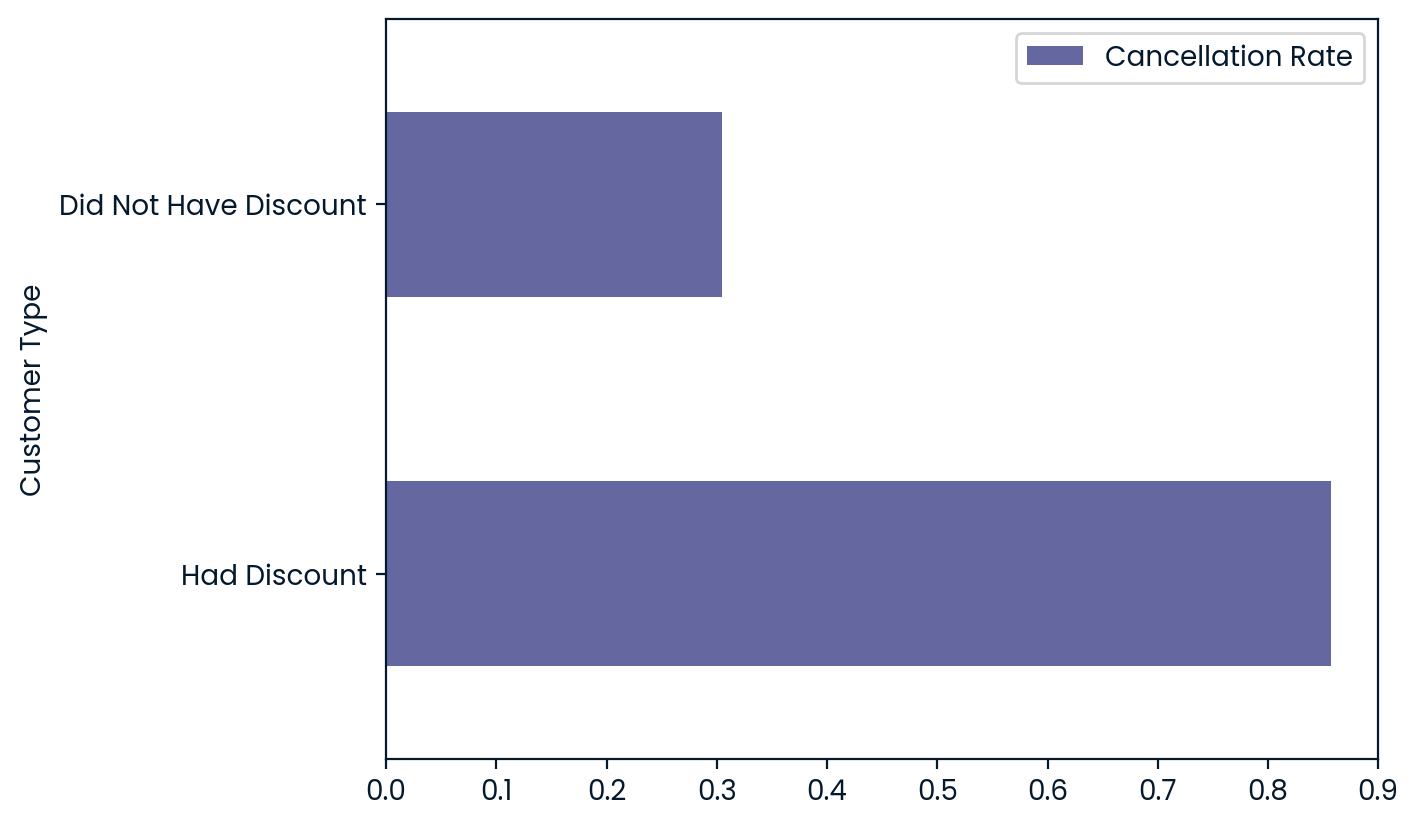

In [54]:
# Now Visualize the cancellation rate for those with a discount Vs those without a discount
pd.DataFrame([['Had Discount', 0.8571428571428571],
             ['Did Not Have Discount', 0.30434782608695654]],
             columns=['Customer Type', 'Cancellation Rate']).plot.barh(x='Customer Type', y='Cancellation Rate', );

Now lets better understand the listening histories:

- Join together the listening history and audio tables
- How many listening sessions did each customer have in the past 3 months?
- What were the most puplular genres that customers listened to ?

In [55]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [56]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [57]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [58]:
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [59]:
# Now split the ID in the audio data so the column can be joined with other tables
audio_clean = pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type', 1:'Audio ID'})
audio_clean.head()

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105


In [60]:
# Now Add the new fields to the original audio table
audio_all = pd.concat([audio_clean, audio], axis=1)
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [61]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [62]:
# let's check the data type of Audio ID in the audio table
audio_all.dtypes

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [63]:
# Change Audio ID to an Int type instead of Object
audio_all['Audio ID'] = audio_all['Audio ID'].astype('int')
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [64]:
# Now merge Listening_history with Audio tables
df = listening_history.merge(audio_all, how='left', on='Audio ID')
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


In [65]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

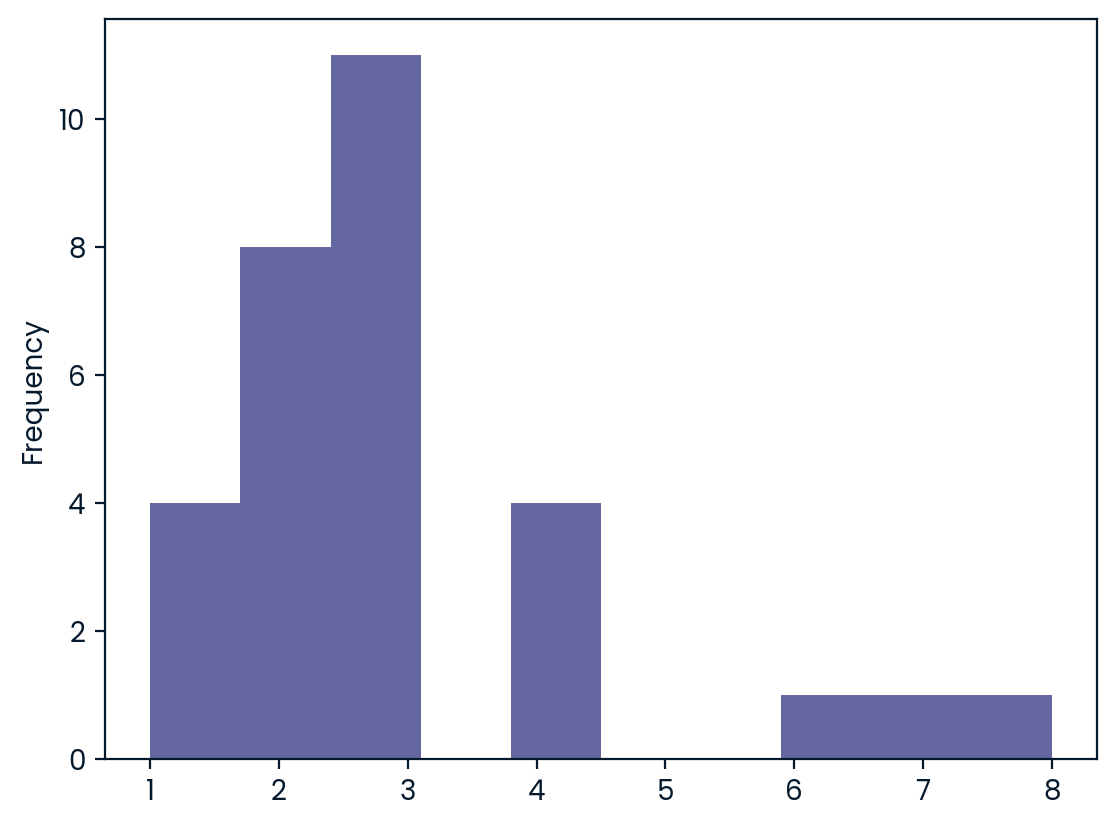

In [66]:
# the number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist();

In [67]:
# The most pupular genres that customers listed to
df.Genre.value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## Step 6: Model Preparation

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [68]:
# create a dataframe for modeling
model_df = customers[['Customer ID', 'Cancelled', 'Discount?']]
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [69]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [71]:
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [72]:
# Calcualte the number of listening sessions for each customers
number_of_sessions = df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [74]:
# Add it to the modelling dataframe
model_df = model_df.merge(number_of_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions_x,Number of Sessions_y
0,5001,0,0,8,8
1,5002,0,0,4,4
2,5004,1,0,1,1
3,5267,0,0,7,7
4,5338,0,0,4,4


In [75]:
df.Genre

0          Pop
1          Pop
2          Pop
3          Pop
4          Pop
        ...   
500       Jazz
501     Comedy
502    Hip Hop
503    Hip Hop
504    Hip Hop
Name: Genre, Length: 505, dtype: object

In [76]:
# Now calculate the dummy variables for each genre
pd.get_dummies(df.Genre)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
500,False,False,False,True,False,False
501,True,False,False,False,False,False
502,False,False,True,False,False,False
503,False,False,True,False,False,False


In [78]:
# Combine it with customer ID
pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,False,False,False,False,True,False
1,5001,False,False,False,False,True,False
2,5001,False,False,False,False,True,False
3,5001,False,False,False,False,True,False
4,5001,False,False,False,False,True,False
...,...,...,...,...,...,...,...
500,7579,False,False,False,True,False,False
501,6588,True,False,False,False,False,False
502,5763,False,False,True,False,False,False
503,5763,False,False,True,False,False,False


In [79]:
# Group it by customer
genres = pd.concat([df['Customer ID'], pd.get_dummies(df.Genre)], axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [80]:
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [81]:
# Now add a column for total songs / podcasts listened to
total_audio = listening_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [82]:
# Create a master audio table to calculate percentages
df_audio = genres.merge(total_audio, how='left', on='Customer ID')
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [83]:
# Now calculate Percent Pop
model_df['Percent Pop'] = df_audio.Pop / df_audio['Total Audio'] * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions_x,Number of Sessions_y,Percent Pop
0,5001,0,0,8,8,56.666667
1,5002,0,0,4,4,0.000000
2,5004,1,0,1,1,100.000000
3,5267,0,0,7,7,51.111111
4,5338,0,0,4,4,0.000000


In [84]:
# Calculate Percent podcasts
model_df['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions_x,Number of Sessions_y,Percent Pop,Percent Podcasts
0,5001,0,0,8,8,56.666667,0.0
1,5002,0,0,4,4,0.000000,0.0
2,5004,1,0,1,1,100.000000,0.0
3,5267,0,0,7,7,51.111111,0.0
4,5338,0,0,4,4,0.000000,0.0


In [85]:
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions_x,Number of Sessions_y,Percent Pop,Percent Podcasts
0,5001,0,0,8,8,56.666667,0.000000
1,5002,0,0,4,4,0.000000,0.000000
2,5004,1,0,1,1,100.000000,0.000000
3,5267,0,0,7,7,51.111111,0.000000
4,5338,0,0,4,4,0.000000,0.000000
5,5404,1,0,1,1,100.000000,0.000000
6,5581,0,0,3,3,0.000000,100.000000
7,5759,1,0,2,2,100.000000,0.000000
8,5761,0,0,3,3,0.000000,100.000000
9,5763,0,0,6,6,64.516129,0.000000


## Step 7: Visualization

Now using a pair plot, visualize the relationships in the modelling dataframe:
- Observations
- What variables might do a good job predicting customer cancellation?

In [86]:
import seaborn as sns

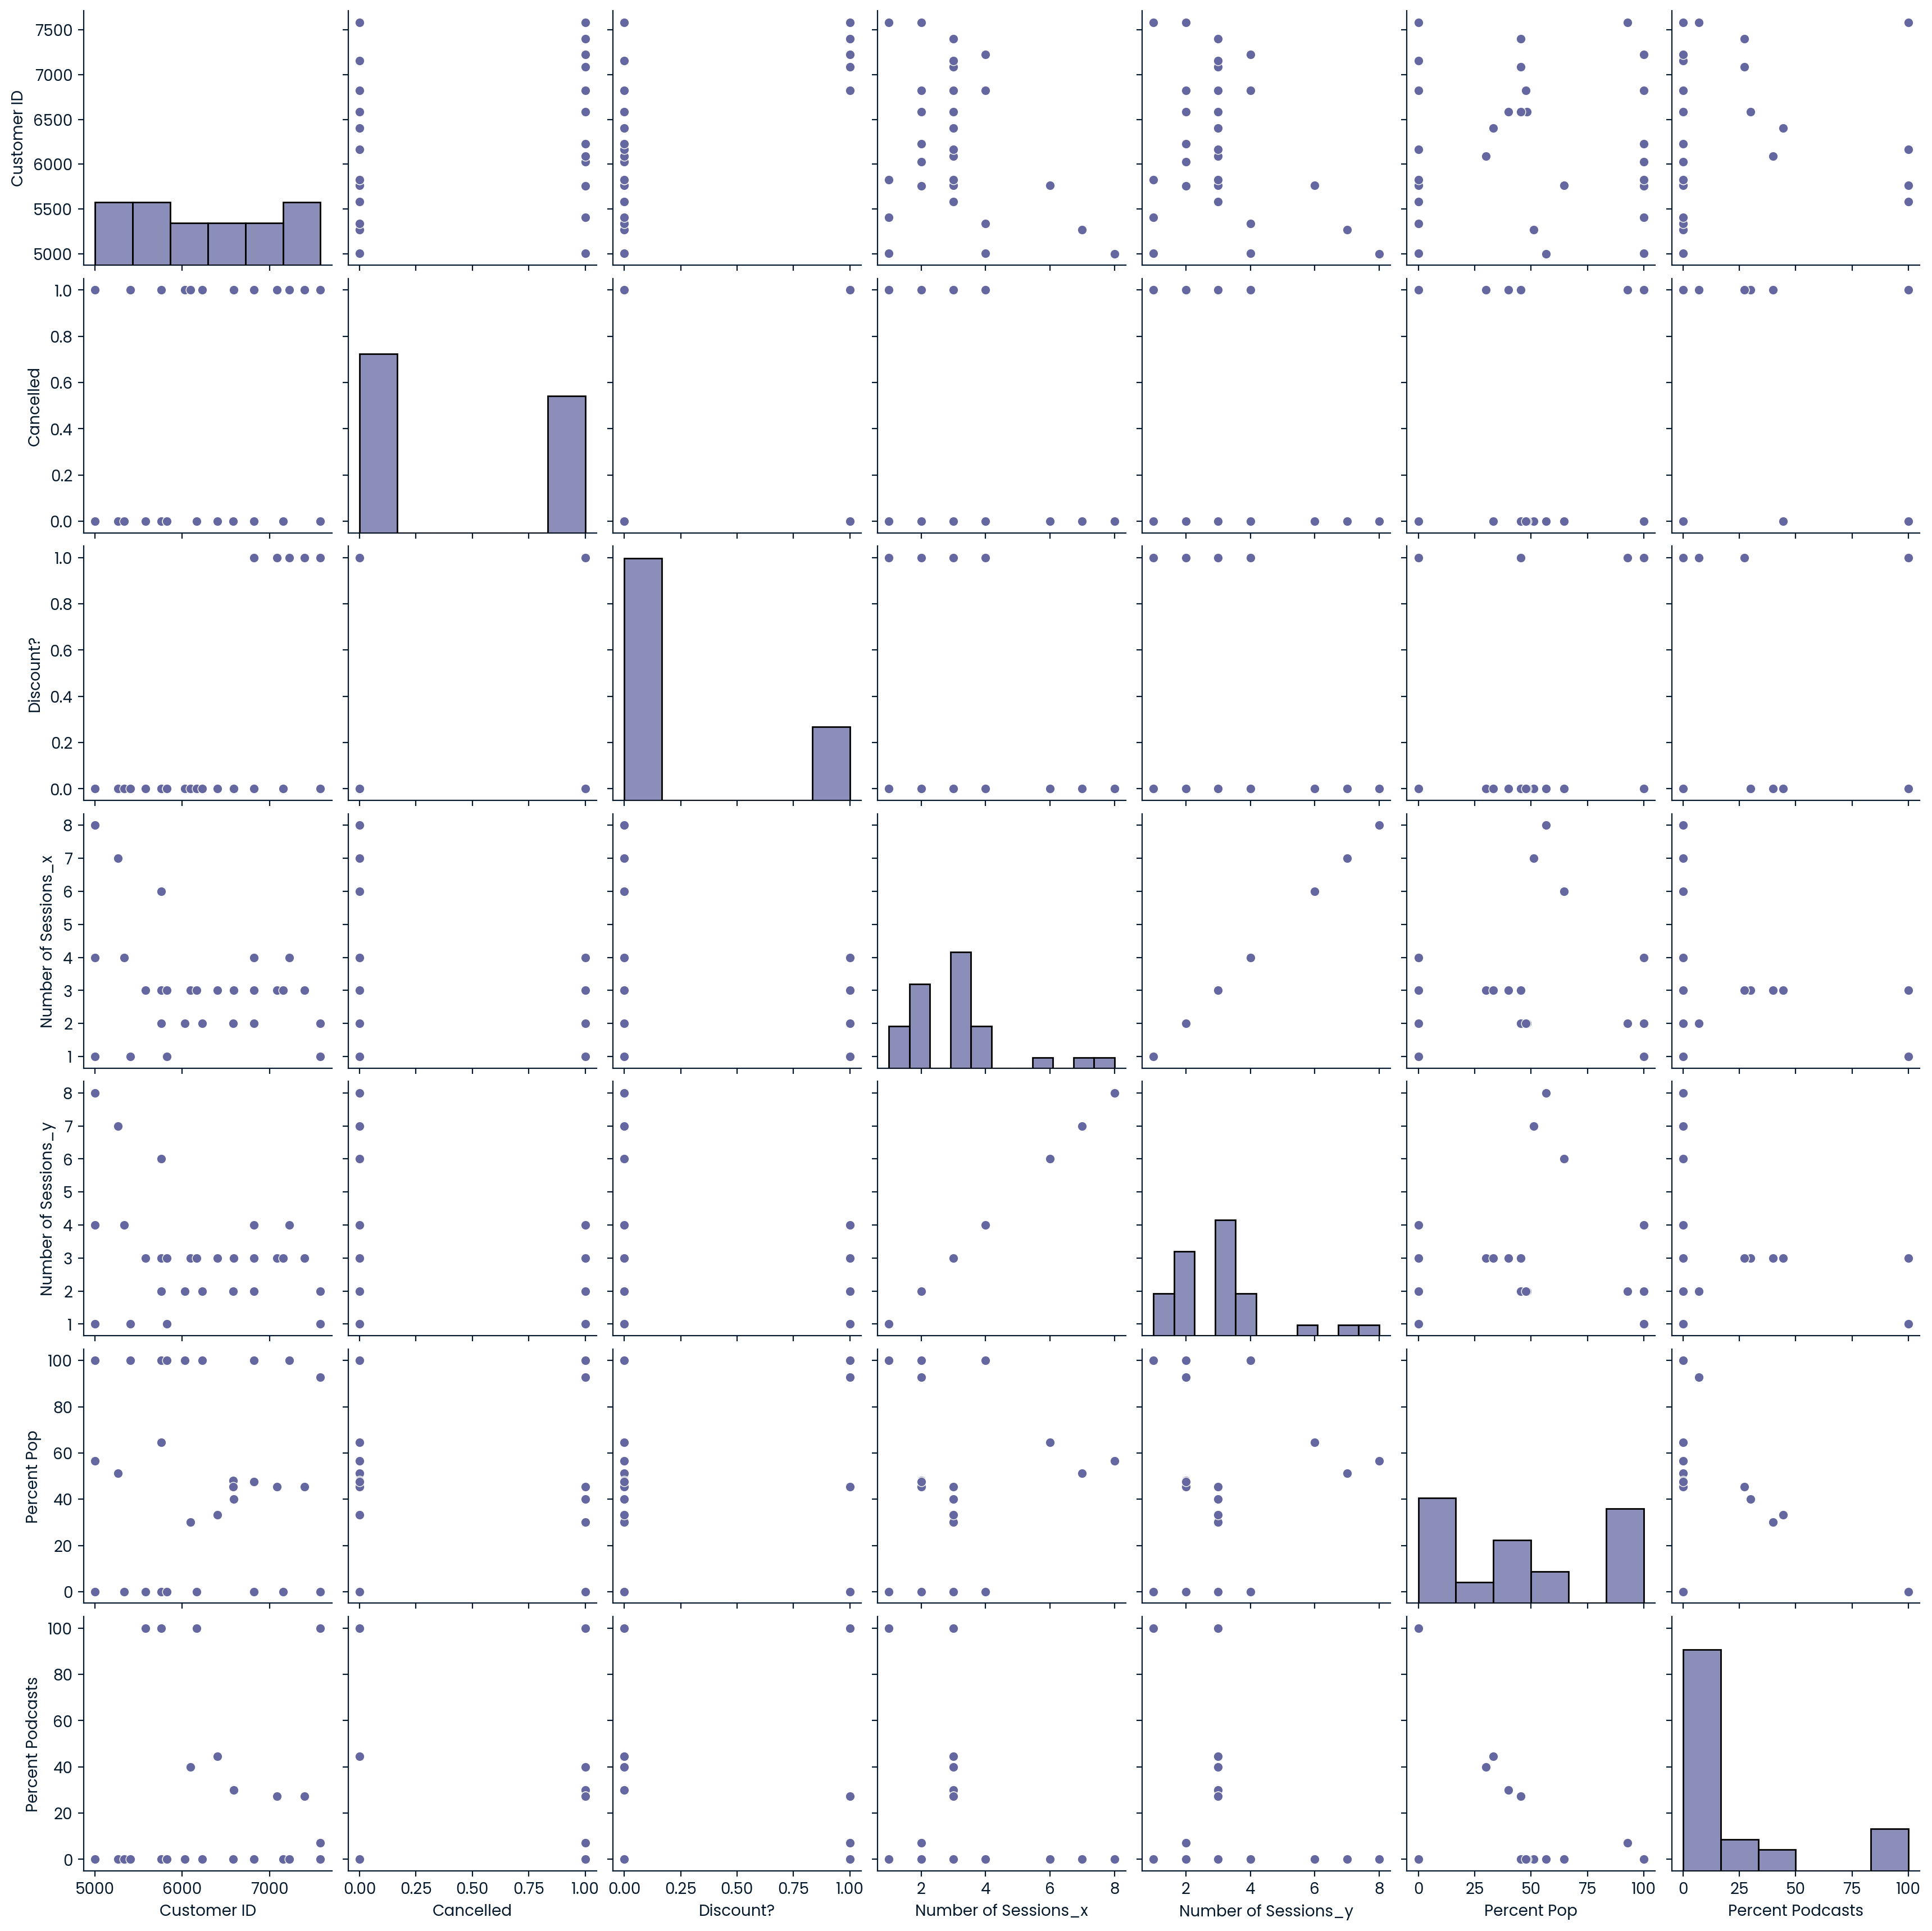

In [87]:
sns.pairplot(model_df)

In [88]:
# Now look at the coorelations
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions_x,Number of Sessions_y,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,-0.048877,0.112675,0.062938
Number of Sessions_x,-0.337083,-0.333739,-0.048877,1.000000,1.000000,-0.131156,-0.125459
Number of Sessions_y,-0.337083,-0.333739,-0.048877,1.000000,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.585630,0.112675,-0.131156,-0.131156,1.000000,-0.487193
Percent Podcasts,0.083083,-0.035414,0.062938,-0.125459,-0.125459,-0.487193,1.000000


From the above, we can derive the following observations:
- A discount is correlated with a cancellation
- The more the listening sessions, the fewer the cancellations
- The more pop music, the more cancellations
- Podcast listening history seems not related with cancellations